               Date Air Temperature
0     11/15/22 0:00           19.70
1     11/15/22 1:00           20.70
2     11/15/22 2:00           21.50
3     11/15/22 3:00           22.20
4     11/15/22 4:00           22.50
...             ...             ...
2899  3/15/23 19:00           15.50
2900  3/15/23 20:00           15.00
2901  3/15/23 21:00           15.20
2902  3/15/23 22:00           14.90
2903  3/15/23 23:00           14.60

[2904 rows x 2 columns]


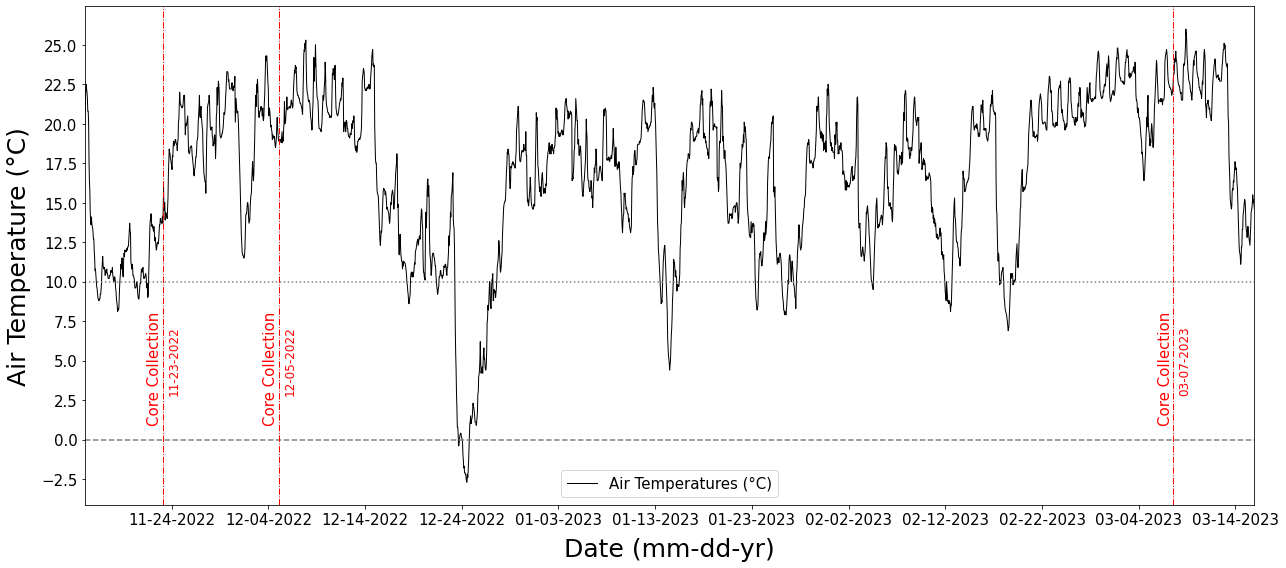

In [114]:
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import datetime
from matplotlib.font_manager import FontProperties
import matplotlib.dates as md

# To import data from csv file that contains dates and hours:
df = pd.read_csv('/Users/agathe/Library/CloudStorage/OneDrive-UniversityofNewOrleans/Foster-Martinez_Coastal_Interactions_Lab_shared/Agathe_Desthomas_Progress_Reports/Python/Temperatures_Grand_Isle_LA/2022_2023_Chilling_Air_Temperatures/2022_2023_Chilling_Grand_Isle_Air_Temperatures.csv', parse_dates=True)
print(df)

df=df.replace('-', regex=True) # no clue why but I kept getting an error message before this line saying can't convert string to float because of '-'



# To prepare values to plot and axis:
#Date=df.iloc[:,0]
#df['Date'] = pd.to_datetime(df['Date'], format = '%m/%d/%y %H:%M') # be careful with dates, %Y is for years with 4 digits, %y is for years with 2 digits

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Ensure Date column is datetime
Date = df['Date']  # Re-assign Date if necessary

Air_Temperature=df['Air Temperature'].astype(float).fillna(0)  # to convert the strings to float and NaN values (empty cells in csv file) to 0.0


# To change the font of the plot:
font=FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')


# To plot the data:
plt.plot(Date, Air_Temperature, color='black', lw=1.0)


# For the title:
#plt.title('Air Temperatures between November 15$^{th}$, 2022 to March 15$^{th}$, 2023 in Grand Isle, Louisiana.', pad = 15, fontsize = 18, fontweight = "bold")


# For the labels and size of axis and ticks:
plt.gca().xaxis.set_major_formatter(md.DateFormatter('%m-%d-%Y')) # Format x-axis labels
plt.xlabel('Date (mm-dd-yr)', fontsize = 25, labelpad=10) 
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(13))
plt.xticks(fontsize = 15)
plt.ylabel('Air Temperature (°C)', fontsize = 25, labelpad=10)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(14))
plt.yticks(fontsize = 15)


# For the size of the graph:
plt.rcParams['figure.figsize'] = [18, 8]


# For the legend:
plt.legend(['Air Temperatures (°C)'], fontsize = 15)


# To add a horizontal line:
plt.axhline(y = 00.0, color = 'grey', linestyle = 'dashed')
plt.axhline(y = 10.0, color = 'grey', linestyle = 'dotted')

# To draw a vertical line:
for date in ['11/23/2022 2:00']:
    date_timestamp = pd.Timestamp(date)
    plt.axvline(pd.to_datetime(date, format='%m/%d/%Y %H:%M'), color='red', linestyle='dashdot', lw=1)
    plt.text(date_timestamp + pd.Timedelta(hours=-2), 
             max(Air_Temperature) - 21.5,  # Adjust the y-position as needed
             'Core Collection', rotation=90, color='red', va='center', ha='right', fontsize=15)
    plt.text(date_timestamp + pd.Timedelta(hours=12), 
             max(Air_Temperature) - 21,  # Adjust the y-position as needed
             '11-23-2022', rotation=90, color='red', va='center', ha='left', fontsize=12)

    
# To draw a vertical line:
for date in ['12/05/2022 2:00']:
    date_timestamp = pd.Timestamp(date)
    plt.axvline(pd.to_datetime(date, format='%m/%d/%Y %H:%M'), color='red', linestyle='dashdot', lw=1)
    plt.text(date_timestamp + pd.Timedelta(hours=-2), 
             max(Air_Temperature) - 21.5,  # Adjust the y-position as needed
             'Core Collection', rotation=90, color='red', va='center', ha='right', fontsize=15)
    plt.text(date_timestamp + pd.Timedelta(hours=12), 
             max(Air_Temperature) - 21,  # Adjust the y-position as needed
             '12-05-2022', rotation=90, color='red', va='center', ha='left', fontsize=12)

    
    # To draw a vertical line:
for date in ['03/07/2023 14:00']:
    date_timestamp = pd.Timestamp(date)
    plt.axvline(pd.to_datetime(date, format='%m/%d/%Y %H:%M'), color='red', linestyle='dashdot', lw=1)
    plt.text(date_timestamp + pd.Timedelta(hours=-2), 
             max(Air_Temperature) - 21.5,  # Adjust the y-position as needed
             'Core Collection', rotation=90, color='red', va='center', ha='right', fontsize=15)
    plt.text(date_timestamp + pd.Timedelta(hours=12), 
             max(Air_Temperature) - 21,  # Adjust the y-position as needed
             '03-07-2023', rotation=90, color='red', va='center', ha='left', fontsize=12)

    
    
# Set x-axis limits to remove extra space
plt.xlim([Date.min(), Date.max()])  # Adjusts limits to your data range

# Automatically adjust layout
plt.tight_layout()


# To save as PNG:
plt.savefig('Plot_Of_Mild_Freeze_Temperatures_During_Freezing_Event_Grand_Isle_2022.png', bbox_inches='tight')